In [1]:
from qaoa_rigetti import qaoa_customquil, qaoa_maxcut

In [2]:
import matplotlib.pyplot as plt

In [3]:
# Define a qaoa instance
# First n angles ar the betas and the last n are the gammas.
def qaoa_maxcut_instance(angles):
    edges = [(0,1),(1,2),(2,3)]
    return qaoa_maxcut(edges, angles)
def qaoa_maxcut_negative(angles):
    return -qaoa_maxcut_instance(angles)

In [5]:
edges = [(0,1),(1,2),(2,3)]
qaoa_maxcut(edges,[0.1,0.2,0.3,0.4])

0.574

In [6]:
qaoa_maxcut_negative([0.1,0.2])

-0.081

In [9]:
test = []
for angle in range(0,100):
    test.append(qaoa_maxcut_instance([0.1,0.2,0.3,angle/100 * 3.141592]))

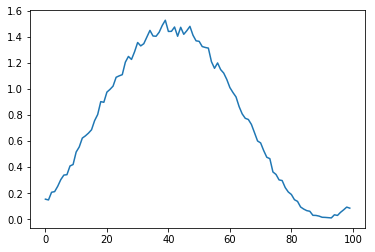

In [10]:
plt.plot(test)

In [11]:
from scipy.optimize import minimize

In [21]:
history = []
def callback(x):
    fobj = qaoa_maxcut_negative(x)
    history.append(fobj)
x0=[0.1,0.2,0.3,0.4]
res = minimize(qaoa_maxcut_negative, x0, method='SLSQP', callback=callback, options={'disp':True})
print(history)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -1.528
            Iterations: 21
            Function evaluations: 337
            Gradient evaluations: 21
[-0.749, -0.79, -0.753, -0.948, -1.217, -1.111, -0.391, -1.232, -0.298, -1.565, -0.416, -1.117, -1.678, -0.614, -1.859, -1.417, -1.451, -1.375, -1.503, -1.463, -1.513]


In [20]:
print(res)

     fun: -1.436
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 46
  status: 1
 success: True
       x: array([0.09752487, 0.19429795, 1.30047692, 0.39870339])


In [9]:
from scipy.optimize import basinhopping

In [15]:
minimizer_kwargs={"method":"BFGS"}
basinhopping(qaoa_ising,x0,minimizer_kwargs=minimizer_kwargs,niter=20)

/usr/local/lib/python3.6/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


                        fun: -2.0
 lowest_optimization_result:       fun: -2.0
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([20.09562037, 31.42309328])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 1
                       nfev: 440
                        nit: 20
                       njev: 107
                          x: array([20.09562037, 31.42309328])